In [279]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from collections import Counter
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt      
import seaborn as sns

Variables

In [280]:
PATH_TO_NUMERIC_DATA = 'data/numeric_data.csv'
df = pd.read_csv(PATH_TO_NUMERIC_DATA)

Linear Regression

In [281]:
regressor=LinearRegression()
X=df[df.columns[df.columns != 'Price']]
Y=df[['Price']]
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

regressor.fit(X_train , Y_train)
Y_pred=regressor.predict(X_test)
regressor.score(X_test, Y_test)

0.25624945895609863

<Axes: >

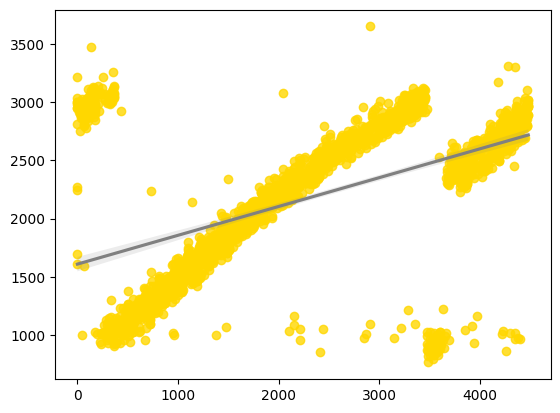

In [282]:
sns.regplot(x=Y_test.values.flatten(), y=Y_pred.flatten(), scatter_kws={'color':'gold'}, line_kws={'color':'gray'})

Adding new Columns to the Data-Frame

In [283]:
added_cols_df = df.copy()
added_cols_df['Price / Brand'] = added_cols_df['Price'] / added_cols_df['Brand']
added_cols_df['Price / Condition'] = added_cols_df['Price'] / added_cols_df['Condition']

In [284]:
regressor=LinearRegression()
X=added_cols_df[added_cols_df.columns[added_cols_df.columns != 'Price']]
Y=added_cols_df[['Price']]
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

regressor.fit(X_train , Y_train)
Y_pred=regressor.predict(X_test)
regressor.score(X_test, Y_test)

0.8536129256373236

<Axes: >

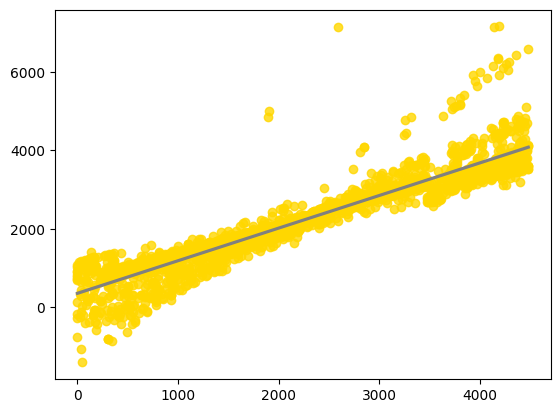

In [285]:
sns.regplot(x=Y_test.values.flatten(), y=Y_pred.flatten(), scatter_kws={'color':'gold'}, line_kws={'color':'gray'})

Adding more colums caused overfitting

In [286]:
added_cols_df['Price / Year of Production'] = added_cols_df['Price'] / added_cols_df['Year of Production']

In [287]:
regressor=LinearRegression()
X=added_cols_df[added_cols_df.columns[added_cols_df.columns != 'Price']]
Y=added_cols_df[['Price']]
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

regressor.fit(X_train , Y_train)
Y_pred=regressor.predict(X_test)
regressor.score(X_test, Y_test)

0.9148414148387098

<Axes: >

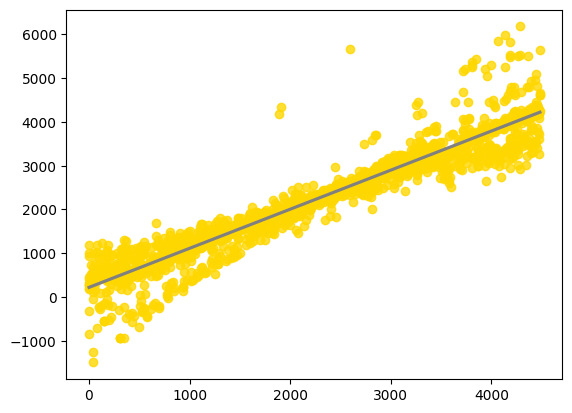

In [288]:
sns.regplot(x=Y_test.values.flatten(), y=Y_pred.flatten(), scatter_kws={'color':'gold'}, line_kws={'color':'gray'})

Random Forest

In [289]:
X=df[df.columns[df.columns != 'Price']]
Y=df[['Price']]
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)
model = RandomForestRegressor(n_estimators=100, random_state=50)
model.fit(X_train, Y_train.values.ravel())
train_score = model.score(X_train, Y_train)
print(model.score(X_test, Y_test))

0.875839876896096


KNN Regression

In [290]:
X=added_cols_df[added_cols_df.columns[added_cols_df.columns != 'Price']]
Y=added_cols_df[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=800)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

0.8836200222236472

<Axes: >

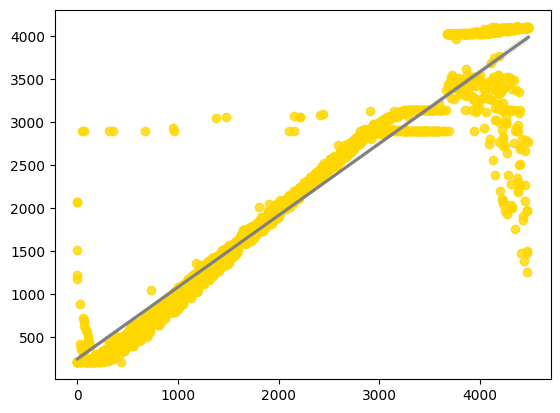

In [291]:
sns.regplot(x=y_test.values.flatten(), y=y_pred.flatten(), scatter_kws={'color':'gold'}, line_kws={'color':'gray'})

Lasso Regression

In [292]:
X=added_cols_df[added_cols_df.columns[added_cols_df.columns != 'Price']]
Y=added_cols_df[['Price']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=200)
lasso.fit(X_train, Y_train)
Y_pred = lasso.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
r2

0.8823212594769464

<Axes: >

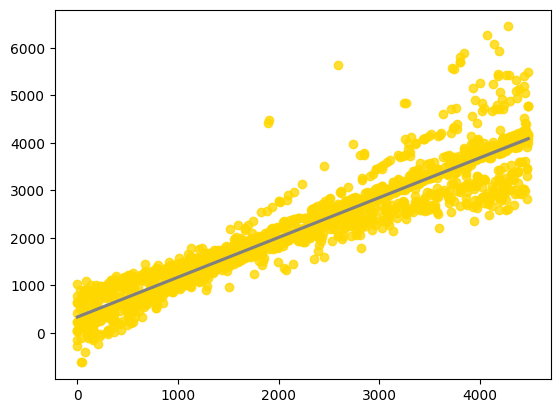

In [293]:
sns.regplot(x=Y_test.values.flatten(), y=Y_pred.flatten(), scatter_kws={'color':'gold'}, line_kws={'color':'gray'})